# Homework 2: Multiple Linear Regression (50 points)

**Reading**: Data8 textbook chapters [15](https://www.inferentialthinking.com/chapters/15/Prediction) and  [16](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.


Homework 2 is due on Friday April 15, 2022 at 6:00pm. 

In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Birth Weight (50 points) ##

The data below contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.


This dataset was used last quarter, but the only question investigated there was on the association of maternal smoking with birth weight. Here we will try to provide a better understanding of the factors that influence birth weight.

**The variable of interest is Birth Weight.**

In [7]:
# this commands loads the data into a data frame
baby_df=pd.read_csv("baby.csv")
baby_df.head(10)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
5,138,244,33,62,178,False
6,132,245,23,65,140,False
7,120,289,25,62,125,False
8,143,299,30,66,136,True
9,140,351,27,68,120,False


#### Question 1 ( Visualization, 10 points)

Draw scatter plots of Birth Weight (on the y-axis) versus the four quantitative variables. Also construct a graph that shows the relation between Birth Weight and Maternal Smoker (Hint: boxplots, histograms, or violin plots).  
Why do Maternal Height and Maternal age have stripes but gestational days and pregnancy weight do not?

Text(0, 0.5, 'Baby weight  (ounces)')

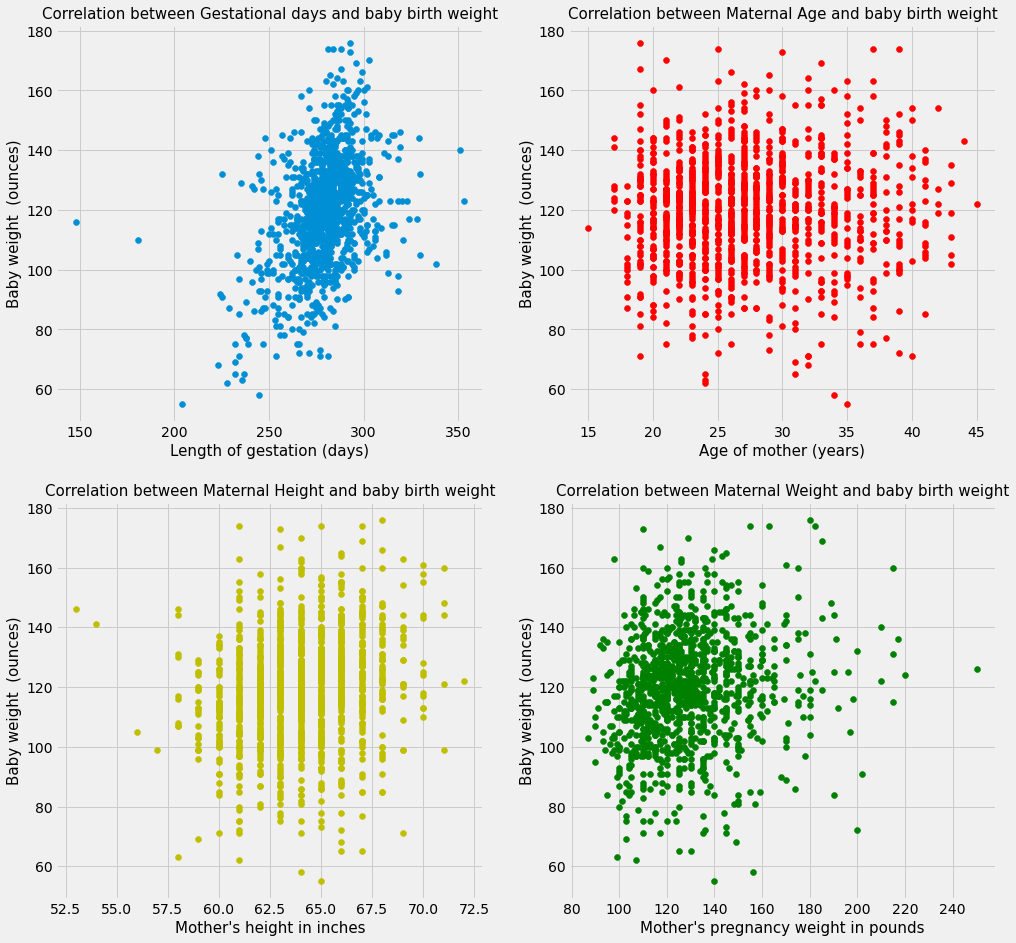

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (15,15))
axs[0, 0].scatter(baby_df["Gestational Days"], baby_df["Birth Weight"])
axs[0, 0].set_title('Correlation between Gestational days and baby birth weight', fontsize=15)
axs[0, 0].set_xlabel("Length of gestation (days)", size=15)
axs[0, 0].set_ylabel("Baby weight  (ounces)", size=15)
axs[0, 1].scatter(baby_df["Maternal Age"], baby_df["Birth Weight"], color="r")
axs[0, 1].set_title('Correlation between Maternal Age and baby birth weight', fontsize=15)
axs[0, 1].set_xlabel("Age of mother (years)", size=15)
axs[0, 1].set_ylabel("Baby weight  (ounces)", size=15)
axs[1, 0].scatter(baby_df["Maternal Height"], baby_df["Birth Weight"], color = "y")
axs[1, 0].set_title('Correlation between Maternal Height and baby birth weight', fontsize=15)
axs[1, 0].set_xlabel("Mother's height in inches", size=15)
axs[1, 0].set_ylabel("Baby weight  (ounces)", size=15)
axs[1, 1].scatter(baby_df["Maternal Pregnancy Weight"], baby_df["Birth Weight"], color = "g")
axs[1, 1].set_title('Correlation between Maternal Weight and baby birth weight', fontsize=15)
axs[1, 1].set_xlabel("Mother's pregnancy weight in pounds", size=15)
axs[1, 1].set_ylabel("Baby weight  (ounces)", size=15)

In [15]:
#Why do Maternal Height and Maternal age have stripes but gestational days and pregnancy weight do not?
#Height and maternal age have stripes because age and height range across a small selection of possible x-values (whole years and inches respectively).  Thus, this small range means that stripes occur because values stack
#Hence, stripes occur to show how how mother's heights/ages are categorizable

#However, gestation days and pregnancy weight are variables with far greater distribution (not around whole values) with a much larger range and can not be treated as categorical, meaning that data isn't clumped at certain x-values and thus there are no stripes.

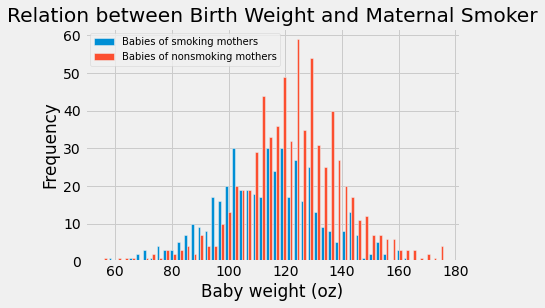

In [45]:
Smoker = baby_df.loc[baby_df["Maternal Smoker"] == True]
NonSmoker = baby_df.loc[baby_df["Maternal Smoker"] == False]

plt.hist([Smoker["Birth Weight"],NonSmoker["Birth Weight"]], bins=50,label = ["Babies of smoking mothers", "Babies of nonsmoking mothers"])
plt.xlabel("Baby weight (oz)")
plt.ylabel("Frequency")
plt.title("Relation between Birth Weight and Maternal Smoker")
plt.legend(loc='upper left', prop={'size': 10})

**For Questions 2-6, you should write your own code (it is fine to copy functions that we wrote for the class/lecture notebooks); do not use existing regression functions in Python libraries. (Optimization or linear algebra solvers are ok.)  All relevant code is in class notebooks.**

*Write your answer here, replacing this text.*

#### Question 2 (Simple Linear Regression, Gestational Age, 5 points)

Fit a simple linear regression model for `Gestational Days` (as the predictor) and `Birth Weight` (as the response). Calculate the intercept, the slope and a 95% Confidence Interval for the slope. Briefly discuss your results by: (i) interpreting the slope; (ii) discussing the signficance of the predictor (is there evidence that the slope is different than 0?); (iii) commenting on whether the results make sense (does it make sense for birth weight to be associated with gestational age?).



In [13]:
# code here and in additional cells if needed

#Predicting weight
def weight_predictor(gestational_days):
    r = np.sum(((baby_df["Gestational Days"]-baby_df["Gestational Days"].mean())/baby_df["Gestational Days"].std())*(baby_df["Birth Weight"]-baby_df["Birth Weight"].mean())/baby_df["Birth Weight"].std())/(len(baby_df)-1)
    slope =np.cov(baby_df["Gestational Days"],baby_df["Birth Weight"])[1,0]/np.var(baby_df["Gestational Days"])
    intercept =baby_df["Birth Weight"].mean()-slope*baby_df["Gestational Days"].mean()   
    return(gestational_days * slope + intercept)

#Predicting values
def slope(df):
    a = np.cov(df["Gestational Days"],df["Birth Weight"])[1,0]/np.var(df["Gestational Days"])
    return(a)

intercept = baby_df["Birth Weight"].mean()-slope(baby_df)*baby_df["Gestational Days"].mean()  


#95% confidence interval
slopey=[]
for i in range(200):
    test = baby_df.sample(len(baby_df), replace = True)
    slopey.append(slope(test))
    left = np.percentile(slopey, 2.5)
    right = np.percentile(slopey, 97.5)
print("(", left, ",", right, ") forms the 95% confidence interval for the slope, ", slope(baby_df), "is the slope of the predictor function and ", intercept, "is the intercept of the predictor function.")

( 0.37711746185518796 , 0.5481033585754634 ) forms the 95% confidence interval for the slope,  0.46695462364738194 is the slope of the predictor function and  -10.865150559982439 is the intercept of the predictor function.


In [41]:
#Results discussed
#1: The slope indicates that, on average, for every increase in the gestational period by 1 day, the baby's weight is expected to rise by 0.467 ounces.
#2: We are sure that the slopes are not zero becaues the 95% confidence interval doesn't contain zero
#3: The low slope value indicates that gestational age has little impact on the baby's birth weight, but some impact nonetheless.  This could make sense, because a baby with a longer gestation could receive more nutrients, making them larger.

#### Question 3 (Simple Linear Regression, Maternal Age, 5 points)

Repeat Question 2 for Maternal Age.


In [14]:
# code here and in additional cells if needed
#Predicting values
def slope(df):
    a = np.cov(df["Maternal Age"],df["Birth Weight"])[1,0]/np.var(df["Maternal Age"])
    return(a)

intercept = baby_df["Birth Weight"].mean()-slope(baby_df)*baby_df["Maternal Age"].mean()  


#95% confidence interval
slopey=[]
for i in range(200):
    test = baby_df.sample(len(baby_df), replace = True)
    slopey.append(slope(test))
    left = np.percentile(slopey, 2.5)
    right = np.percentile(slopey, 97.5)
print("(", left, ",", right, ") forms the 95% confidence interval for the slope, ", slope(baby_df), "is the slope of the predictor function and ", intercept, "is the intercept of the predictor function.")

( -0.05693199874811989 , 0.26943721907213314 ) forms the 95% confidence interval for the slope,  0.08508013972223247 is the slope of the predictor function and  117.14593548010146 is the intercept of the predictor function.


*Write your answer here, replacing this text.*

In [ ]:
#Results discussed
#1: The slope indicates that, on average, for every increase in the mother's age by 1 year, the baby's weight is expected to rise by 0.085 ounces.
#2: The predictor demonstrates evidence that the slope of the predictor could be zero, as the 95% confidence interval does include negative slope values.  However, because most of the confidence interval lies above zero, this means that 0 could be a possible value for the slope, but it is not very likely.
#3: The slope does indicate that the mother's age has very little impact on the baby's age, meaning birth weight is only very weakly associated with the mother's age (furthermore, there could be no relationship at all).  This makes sense, because we wouldn't expect a mother's age to impact their child's birth weight.

#### Question 4 (Simple Linear Regression, Maternal Height, 5 points)

Repeat Question 2 for Maternal Height and plot the residuals.


In [15]:
# code here and in additional cells if needed
#Predicting values
def slope(df):
    a = np.cov(df["Maternal Height"],df["Birth Weight"])[1,0]/np.var(df["Maternal Height"])
    return(a)

intercept = baby_df["Birth Weight"].mean()-slope(baby_df)*baby_df["Maternal Height"].mean()  


#95% confidence interval
slopey=[]
for i in range(200):
    test = baby_df.sample(len(baby_df), replace = True)
    slopey.append(slope(test))
    left = np.percentile(slopey, 2.5)
    right = np.percentile(slopey, 97.5)
print("(", left, ",", right, ") forms the 95% confidence interval for the slope, ", slope(baby_df), "is the slope of the predictor function and ", intercept, "is the intercept of the predictor function.")

( 1.0103164489300969 , 1.9747175125200886 ) forms the 95% confidence interval for the slope,  1.4792793854765405 is the slope of the predictor function and  24.71555867843017 is the intercept of the predictor function.


In [ ]:
#Results discussed
#1: The slope indicates that, on average, for every increase in the mother's height by 1 inch, the baby's weight is expected to rise by 1.479 ounces.
#2: The predictor demonstrates evidence that the slope of the predictor will very likely not be zero, because the 95% confidence interval lies above zero, meaning there is little to no evidence that the slope could be zero.
#3: This makes sense because bigger mothers would likely have genes that favor larger children, thus leading to larger babies being born from larger mothers.

*Write your answer here, replacing this text.*

#### Question 5 (Simple Linear Regression, Maternal Smoking, 5 points)

Fit a simple linear regression model with `Maternal Smoker` as the predictor (x variable). You need to create a dummy variable, a numerical variable with values 0 and 1 for that. 

What is the meaning of slope and intercept here?


In [16]:
# code here and in additional cells if needed
Smoke=[]

loss = baby_df["Maternal Smoker"]

for i in loss:
    if i==False:
        Smoke.append(0)
    if i==True:
        Smoke.append(1)
      
mean=sum(Smoke)/len(Smoke)

slope=np.cov(Smoke,baby_df["Birth Weight"])[1,0]/np.var(Smoke)
intercept =baby_df["Birth Weight"].mean()-slope*mean   

print("Linear regression model: slope:", slope, ", intercept:", intercept)

#The slope means that if a mother smokes, then their baby's weight is expected to be lower than the weight of the baby of a nonsmoking mom by 9.27 ounces
#The intercept means that the average weight of the baby of a nonsmoking mother is about 123.09 ounces

Linear regression model: slope: -9.27404209680926 , intercept: 123.08840317072867


In [10]:
len(Smoke)

1174

*Write your answer here, replacing this text.*

#### Question 6 (Multiple Linear Regression, 10 points)

Fit a multiple linear regression with four predictors: Gestational Days, Maternal Smoking, Maternal Height and Maternal Pregagncy Weight. 

To do this, you should probably write a loss function that returns a single value and run scipy.optimize.minimize().  

Here you are required only to find the least square parameters (the value of the parameters that minimize the least squares function). Discuss whether these parameters have changed dramatically from when you fitted simple linear regressions (for the three variables for which you did that above). 

In [17]:
# code here and in additional cells if needed
baby_df["Maternal Smoking"] = Smoke
baby_df.head()

from datascience import *

def MSE(b0,b1,b2,b3,b4):
    estimate = b0 + b1*baby_df["Gestational Days"] + b2 * baby_df["Maternal Smoking"] + b3*baby_df["Maternal Height"] + b4 * baby_df["Maternal Pregnancy Weight"]
    return(np.mean((baby_df["Birth Weight"]-estimate)**2))

dong = minimize(MSE, method="CG")
print("Intercept:", dong[0], ", Parameter for gestational days:", dong[1], ", Parameter for Maternal Smoking:", dong[2], ", Parameter for Maternal Height: ", dong[3], ", Parameter for Maternal Pregnancy Weight:", dong[4])

#From this, we have found that the parameters are as follows: 0.429 for Gestational days, -8.36 for Maternal Smoking, 1.01 for maternal height and 0.062 for maternal pregnancy weight
#For Gestational days, the parameter has somewhat changed from 0.467 but not too much (8.1% difference)
#For Maternal Smoking, the parameter has somewhat changed from -9.27, but not too much (9.8% difference)
#For maternal height, the parameter has noticeably changed from 1.48 (31.8% difference).  This may imply interdependence between variables, which significantly impacted the slope parameter

Intercept: -69.57822876319214 , Parameter for gestational days: 0.42891096566784026 , Parameter for Maternal Smoking: -8.364144090883356 , Parameter for Maternal Height:  1.008826639301984 , Parameter for Maternal Pregnancy Weight: 0.062218649401859366


*Write your answer here, replacing this text.*

#### Question 7 (Prediction and cross validation, 10 points)

Compare two models to predict birth weight. 

Assess the performance of two models using "leave one out" cross validation, where you fit the predictor on n-1 data and evaluate its accuracy predicting the "held out" data point. 

You should do this for two models: (i) the model in Question 6; (ii) a model of your choice. For the model of your choice, pick something that makes sense to you (you will not be evaluated on whether it predicts better than the model in Question 6).

**For computational convenience, you may do the cross-validation only for a subset of the data, let's say the first 100 subjects.**

**For Question 7 you are allowed to use available regression functions if you find them useful (for computational reasons).**

*Describe your model here, replacing this text.*

In [19]:
#Model from 6
x = len(baby_df)-1
sample = baby_df[0:x]
def MSE(b0,b1,b2,b3,b4):
    estimate = b0 + b1*sample["Gestational Days"] + b2 * sample["Maternal Smoking"] + b3*sample["Maternal Height"] + b4 * sample["Maternal Pregnancy Weight"]
    return(np.mean((sample["Birth Weight"]-estimate)**2))

bing = minimize(MSE, method="CG")
bing

array([-59.05626754,   0.41837636,  -8.40407126,   0.88548114,
         0.06501439])

In [24]:
subject = baby_df[x:x+1]
estimate = bing[0]+bing[1]*subject["Gestational Days"] + bing[2] * subject["Maternal Smoking"] + bing[3]*subject["Maternal Height"] + bing[4] * subject["Maternal Pregnancy Weight"]
error = np.abs(estimate - subject["Birth Weight"])/subject["Birth Weight"]
Accuracy = 1 - error
for i in Accuracy:
    print("Using the model from problem 6, the estimate is", i * 100, "% accurate in predicting the held out data point")

Using the model from problem 6, the estimate is 87.91056272387796 % accurate in predicting the held out data point


In [21]:
#Model of my own design
def MSE(b0,b1,b2,b3,b4,b5):
    estimate = b0 + b1*sample["Gestational Days"] + b2 * sample["Maternal Smoking"] + b3*sample["Maternal Height"] + b4 * sample["Maternal Pregnancy Weight"] + b5 * sample["Maternal Pregnancy Weight"]
    return(np.mean((sample["Birth Weight"]-estimate)**2))

bong = minimize(MSE, method="CG")
bong

array([-7.83039583e+01,  4.38769622e-01, -8.36946338e+00,  1.10775908e+00,
        2.97244490e-02,  2.97244490e-02])

In [25]:
subject = baby_df[x:x+1]
estimate = bong[0]+bong[1]*subject["Gestational Days"] + bong[2] * subject["Maternal Smoking"] + bong[3]*subject["Maternal Height"] + bong[4] * subject["Maternal Pregnancy Weight"]+bong[5]*subject["Maternal Pregnancy Weight"]
error = np.abs(estimate - subject["Birth Weight"])/subject["Birth Weight"]
Accuracy = 1 - error
for i in Accuracy:
    print("Using the model from problem 6, the estimate is", i * 100, "% accurate in predicting the held out data point")

Using the model from problem 6, the estimate is 87.44968616097857 % accurate in predicting the held out data point


*Comment on the results here, replacing this text.*